## 1. Importação de Bibliotecas

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TensorFlow/Keras para rede neural
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Seed para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.12.0


## 2. Carregamento dos Dados

In [2]:
# Carregar dados de treino e teste
df_train = pd.read_csv('consumo_energia_train.csv')
df_test = pd.read_csv('consumo_energia_test.csv')

print("=" * 60)
print("INFORMAÇÕES DOS DADOS")
print("=" * 60)
print(f"\nDados de treino: {df_train.shape[0]} amostras")
print(f"Dados de teste: {df_test.shape[0]} amostras")
print(f"\nPrimeiras linhas do conjunto de treino:")
display(df_train.head(10))

INFORMAÇÕES DOS DADOS

Dados de treino: 8000 amostras
Dados de teste: 2000 amostras

Primeiras linhas do conjunto de treino:


,x1,x2,x3,y
0,21.749541,26.782451,48.447425,176.838491
1,30.510106,75.256574,9.755290,140.814265
2,27.477917,34.618591,49.467751,200.971592
3,15.711805,76.413395,6.412410,105.432811
4,26.542342,85.933738,17.737547,157.057714
5,19.949260,20.099801,20.436296,124.977938
6,17.941470,88.353794,39.146083,164.737078
7,27.855548,50.385348,28.975372,170.690346
8,24.396086,46.225716,19.605670,142.034902
9,16.626976,44.109963,2.657480,81.453439


## 3. Exploração de Dados

### 3.1 Estatísticas Descritivas

In [3]:
print("=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - DADOS DE TREINO")
print("=" * 60)
display(df_train.describe())

print("\n" + "=" * 60)
print("INFORMAÇÕES SOBRE VALORES AUSENTES")
print("=" * 60)
print(df_train.isnull().sum())

ESTATÍSTICAS DESCRITIVAS - DADOS DE TREINO


,x1,x2,x3,y
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,24.887160,55.435033,24.964974,154.061455
std,5.736694,20.281298,14.367112,33.742777
min,15.000233,20.011042,0.002406,60.442618
25%,19.967081,37.797189,12.602937,131.377689
50%,24.841180,55.743997,25.039913,157.625436
75%,29.807076,72.992360,37.260944,177.560225
max,34.994353,89.991001,49.995049,233.215126



INFORMAÇÕES SOBRE VALORES AUSENTES
x1    0
x2    0
x3    0
y     0
dtype: int64


### 3.2 Distribuição das Variáveis (Histogramas)

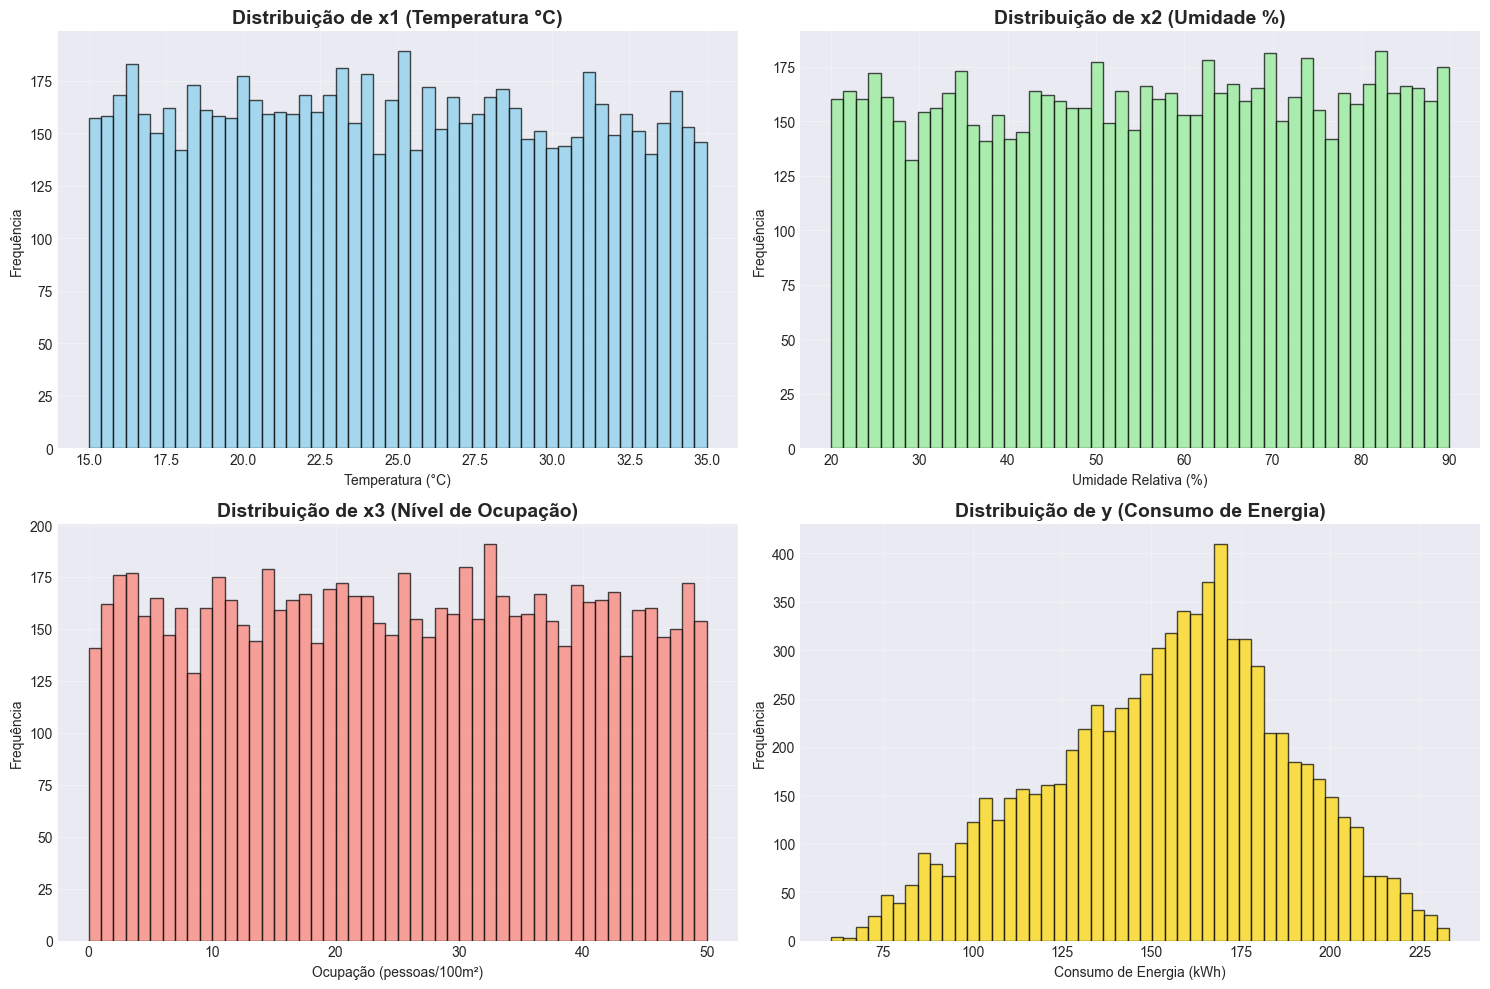

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# x1: Temperatura
axes[0, 0].hist(df_train['x1'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribuição de x1 (Temperatura °C)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Temperatura (°C)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(True, alpha=0.3)

# x2: Umidade
axes[0, 1].hist(df_train['x2'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribuição de x2 (Umidade %)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Umidade Relativa (%)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].grid(True, alpha=0.3)

# x3: Ocupação
axes[1, 0].hist(df_train['x3'], bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribuição de x3 (Nível de Ocupação)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ocupação (pessoas/100m²)')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].grid(True, alpha=0.3)

# y: Consumo de Energia
axes[1, 1].hist(df_train['y'], bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribuição de y (Consumo de Energia)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Consumo de Energia (kWh)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Gráficos de Dispersão (Relação entre variáveis)

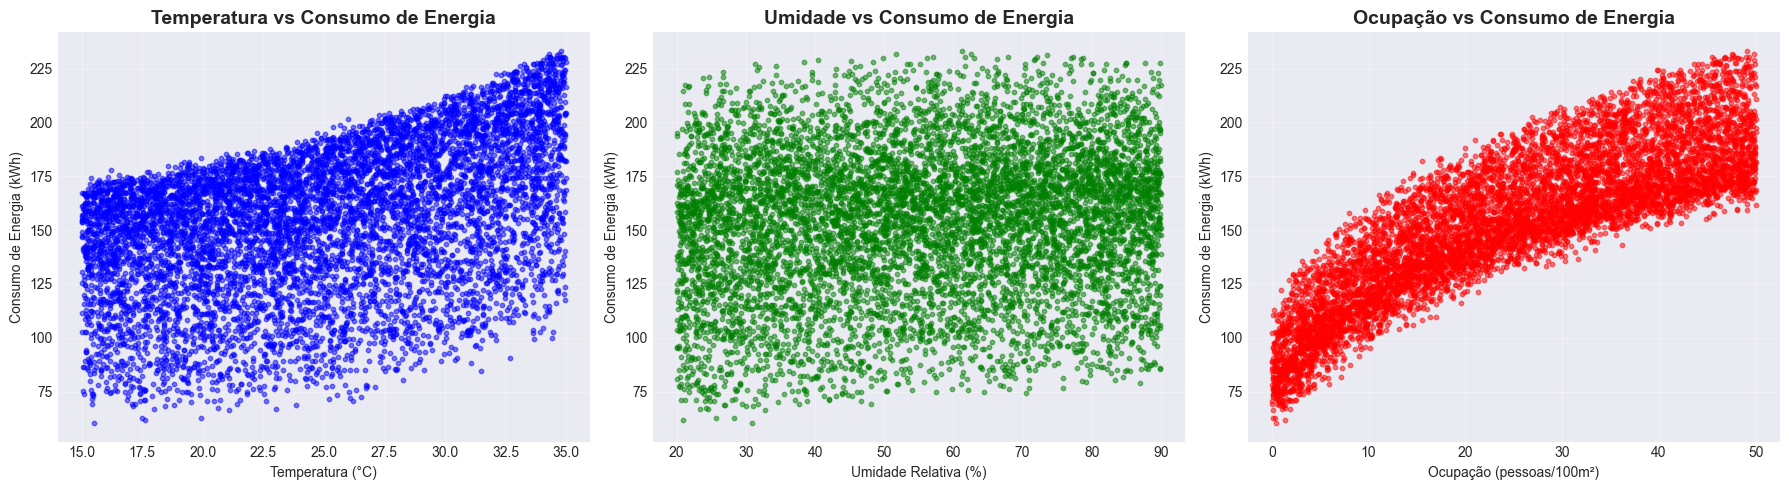

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# x1 vs y
axes[0].scatter(df_train['x1'], df_train['y'], alpha=0.5, s=10, color='blue')
axes[0].set_title('Temperatura vs Consumo de Energia', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('Consumo de Energia (kWh)')
axes[0].grid(True, alpha=0.3)

# x2 vs y
axes[1].scatter(df_train['x2'], df_train['y'], alpha=0.5, s=10, color='green')
axes[1].set_title('Umidade vs Consumo de Energia', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Umidade Relativa (%)')
axes[1].set_ylabel('Consumo de Energia (kWh)')
axes[1].grid(True, alpha=0.3)

# x3 vs y
axes[2].scatter(df_train['x3'], df_train['y'], alpha=0.5, s=10, color='red')
axes[2].set_title('Ocupação vs Consumo de Energia', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Ocupação (pessoas/100m²)')
axes[2].set_ylabel('Consumo de Energia (kWh)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Matriz de Correlação

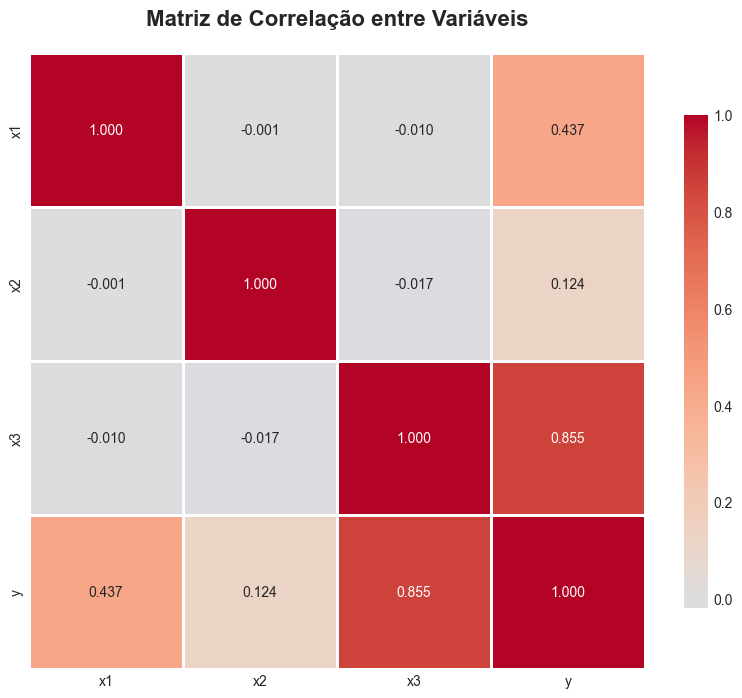


ANÁLISE DE CORRELAÇÃO COM O CONSUMO DE ENERGIA (y)
y     1.000000
x3    0.855029
x1    0.436566
x2    0.123967
Name: y, dtype: float64


In [6]:
# Calcular matriz de correlação
correlation_matrix = df_train.corr()

# Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Matriz de Correlação entre Variáveis', fontsize=16, fontweight='bold', pad=20)
plt.show()

print("\n" + "=" * 60)
print("ANÁLISE DE CORRELAÇÃO COM O CONSUMO DE ENERGIA (y)")
print("=" * 60)
print(correlation_matrix['y'].sort_values(ascending=False))

### 3.5 Discussão das Relações

**Interpretação:**
- A relação entre as variáveis de entrada (x1, x2, x3) e o consumo de energia (y) é não linear
- A temperatura (x1) influencia o consumo principalmente pelo uso de ar-condicionado
- A umidade (x2) afeta a eficiência dos equipamentos de climatização
- O nível de ocupação (x3) está relacionado ao uso de equipamentos e iluminação
- A complexidade dessas interações justifica o uso de uma rede neural como aproximador universal de funções

## 4. Pré-processamento

### 4.1 Separação de Features e Target

In [7]:
# Separar features (X) e target (y)
X_train_full = df_train[['x1', 'x2', 'x3']].values
y_train_full = df_train['y'].values

X_test = df_test[['x1', 'x2', 'x3']].values
y_test = df_test['y'].values

print(f"Shape dos dados de treino: X={X_train_full.shape}, y={y_train_full.shape}")
print(f"Shape dos dados de teste: X={X_test.shape}, y={y_test.shape}")

Shape dos dados de treino: X=(8000, 3), y=(8000,)
Shape dos dados de teste: X=(2000, 3), y=(2000,)


### 4.2 Divisão Treino/Validação (80/20)

In [8]:
# Dividir dados de treino em treino (90%) e validação (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

print("=" * 60)
print("DIVISÃO DOS DADOS")
print("=" * 60)
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/X_train_full.shape[0]*100:.1f}%)")
print(f"Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/X_train_full.shape[0]*100:.1f}%)")
print(f"Teste: {X_test.shape[0]} amostras")

DIVISÃO DOS DADOS
Treino: 7200 amostras (90.0%)
Validação: 800 amostras (10.0%)
Teste: 2000 amostras


### 4.3 Normalização dos Dados

In [9]:
# Padronização (StandardScaler) - fit apenas no treino
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajustar e transformar dados de treino
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Transformar dados de validação e teste
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("=" * 60)
print("NORMALIZAÇÃO CONCLUÍDA")
print("=" * 60)
print(f"Média das features de treino: {X_train_scaled.mean(axis=0)}")
print(f"Desvio padrão das features de treino: {X_train_scaled.std(axis=0)}")

NORMALIZAÇÃO CONCLUÍDA
Média das features de treino: [-1.49713960e-14  1.12460041e-14  1.59773429e-15]
Desvio padrão das features de treino: [1. 1. 1.]


## 5. Construção da Rede Neural (MLP)

### Arquitetura:
- **Camada de Entrada:** 3 neurônios (x1, x2, x3)
- **Camada Oculta:** 10 neurônios com função de ativação ReLU
- **Camada de Saída:** 1 neurônio (y)
- **Otimizador:** Adam
- **Função de Perda:** MSE (Mean Squared Error)

In [10]:
# Criar modelo sequencial
model = keras.Sequential([
    layers.Input(shape=(3,)),  # 3 entradas
    layers.Dense(10, activation='relu', name='camada_oculta'),  # 10 neurônios ocultos
    layers.Dense(1, name='camada_saida')  # 1 saída
], name='MLP_Consumo_Energia')

# Compilar modelo
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error como métrica adicional
)

# Resumo do modelo
print("=" * 60)
print("ARQUITETURA DA REDE NEURAL")
print("=" * 60)
model.summary()

ARQUITETURA DA REDE NEURAL


Model: "MLP_Consumo_Energia"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ camada_oculta (Dense)           │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ camada_saida (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

## 6. Treinamento e Validação

### 6.1 Configuração de Early Stopping

In [11]:
# Configurar early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

print("Early Stopping configurado:")
print(f"  - Monitor: val_loss")
print(f"  - Patience: 20 épocas")
print(f"  - Restore best weights: True")

Early Stopping configurado:
  - Monitor: val_loss
  - Patience: 20 épocas
  - Restore best weights: True


### 6.2 Treinamento do Modelo

In [12]:
print("=" * 60)
print("INICIANDO TREINAMENTO")
print("=" * 60)

# Treinar modelo
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

print("\n" + "=" * 60)
print("TREINAMENTO CONCLUÍDO")
print("=" * 60)

INICIANDO TREINAMENTO
Epoch 1/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7077 - mae: 0.6474 - val_loss: 0.2645 - val_mae: 0.3874
Epoch 2/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.1268 - mae: 0.2690 - val_loss: 0.0696 - val_mae: 0.2116
Epoch 3/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0444 - mae: 0.1698 - val_loss: 0.0301 - val_mae: 0.1402
Epoch 4/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.0227 - mae: 0.1219 - val_loss: 0.0195 - val_mae: 0.1101
Epoch 5/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 - mae: 0.1036 - val_loss: 0.0164 - val_mae: 0.1006
Epoch 6/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0149 - mae: 0.0964 - val_loss: 0.0146 - val_mae: 0.0952
Epoch 7/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0133 - mae: 0.0909 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 8/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117 - mae: 0.0853 - val_loss: 0.0112 - val_mae: 0.0832
Epoch 9/300
225/22

### 6.3 Curvas de Perda (Train/Validation)

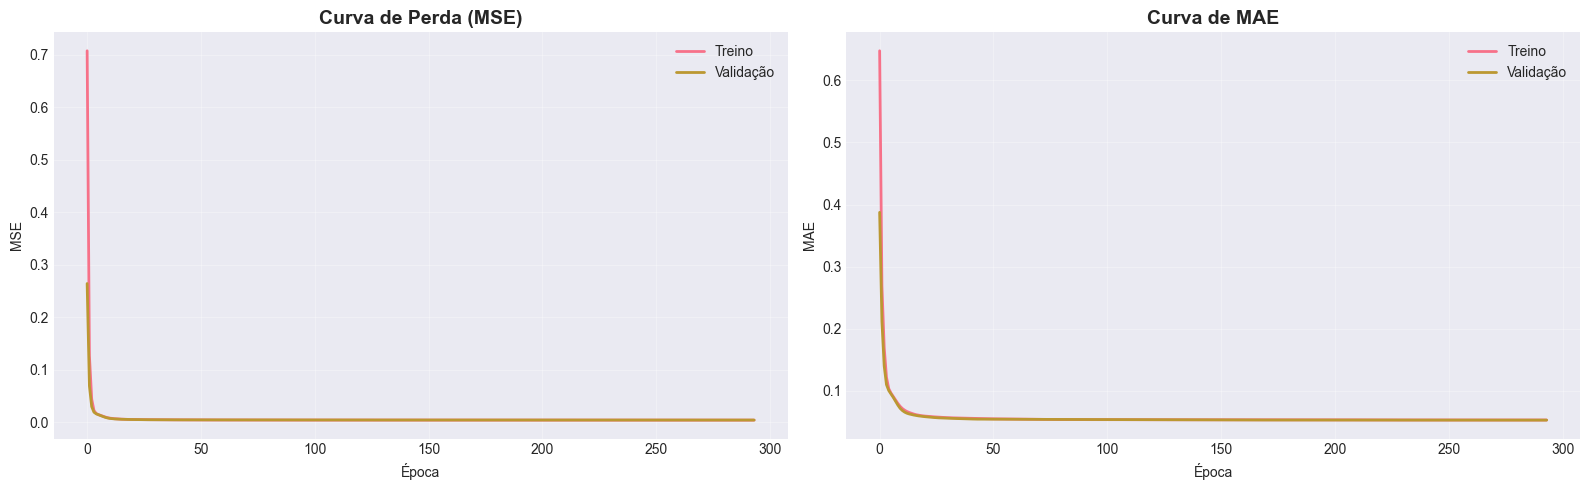


Número de épocas treinadas: 294
Melhor Loss de Validação: 0.004540
Melhor MAE de Validação: 0.052990


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Perda (Loss)
axes[0].plot(history.history['loss'], label='Treino', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validação', linewidth=2)
axes[0].set_title('Curva de Perda (MSE)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('MSE')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Treino', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validação', linewidth=2)
axes[1].set_title('Curva de MAE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Informações sobre o treinamento
print(f"\nNúmero de épocas treinadas: {len(history.history['loss'])}")
print(f"Melhor Loss de Validação: {min(history.history['val_loss']):.6f}")
print(f"Melhor MAE de Validação: {min(history.history['val_mae']):.6f}")

## 7. Avaliação do Modelo

### 7.1 Predições

In [14]:
# Fazer predições (em escala normalizada)
y_train_pred_scaled = model.predict(X_train_scaled, verbose=0).flatten()
y_val_pred_scaled = model.predict(X_val_scaled, verbose=0).flatten()
y_test_pred_scaled = model.predict(X_test_scaled, verbose=0).flatten()

# Reverter normalização para escala original
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

print("Predições realizadas para todos os conjuntos de dados.")

Predições realizadas para todos os conjuntos de dados.


### 7.2 Cálculo de Métricas

In [15]:
# Função para calcular métricas
def calcular_metricas(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{'='*60}")
    print(f"MÉTRICAS - {dataset_name}")
    print(f"{'='*60}")
    print(f"MSE (Erro Quadrático Médio):      {mse:.4f}")
    print(f"RMSE (Raiz do MSE):                {rmse:.4f}")
    print(f"MAE (Erro Absoluto Médio):         {mae:.4f}")
    print(f"R² (Coeficiente de Determinação):  {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calcular métricas para cada conjunto
metricas_train = calcular_metricas(y_train, y_train_pred, "CONJUNTO DE TREINO")
metricas_val = calcular_metricas(y_val, y_val_pred, "CONJUNTO DE VALIDAÇÃO")
metricas_test = calcular_metricas(y_test, y_test_pred, "CONJUNTO DE TESTE")


MÉTRICAS - CONJUNTO DE TREINO
MSE (Erro Quadrático Médio):      4.9421
RMSE (Raiz do MSE):                2.2231
MAE (Erro Absoluto Médio):         1.7718
R² (Coeficiente de Determinação):  0.9956

MÉTRICAS - CONJUNTO DE VALIDAÇÃO
MSE (Erro Quadrático Médio):      5.1196
RMSE (Raiz do MSE):                2.2627
MAE (Erro Absoluto Médio):         1.7796
R² (Coeficiente de Determinação):  0.9959

MÉTRICAS - CONJUNTO DE TESTE
MSE (Erro Quadrático Médio):      4.7938
RMSE (Raiz do MSE):                2.1895
MAE (Erro Absoluto Médio):         1.7491
R² (Coeficiente de Determinação):  0.9956


### 7.3 Comparação de Métricas


RESUMO COMPARATIVO DAS MÉTRICAS


,Treino,Validação,Teste
MSE,4.942140,5.119617,4.793840
RMSE,2.223092,2.262657,2.189484
MAE,1.771834,1.779569,1.749113
R2,0.995618,0.995853,0.995638


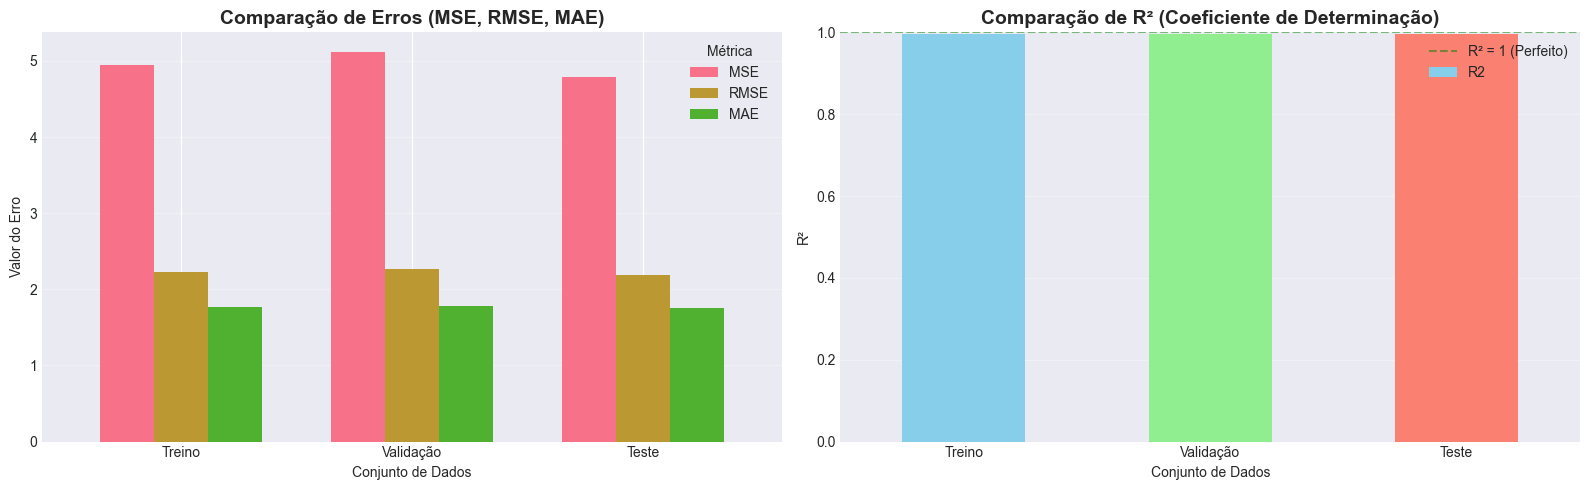

In [16]:
# Criar DataFrame com as métricas
df_metricas = pd.DataFrame({
    'Treino': metricas_train,
    'Validação': metricas_val,
    'Teste': metricas_test
})

print("\n" + "="*60)
print("RESUMO COMPARATIVO DAS MÉTRICAS")
print("="*60)
display(df_metricas)

# Plotar comparação de métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras para MSE, RMSE, MAE
df_metricas.loc[['MSE', 'RMSE', 'MAE']].T.plot(kind='bar', ax=axes[0], width=0.7)
axes[0].set_title('Comparação de Erros (MSE, RMSE, MAE)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor do Erro')
axes[0].set_xlabel('Conjunto de Dados')
axes[0].legend(title='Métrica')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Gráfico de barras para R²
df_metricas.loc['R2'].plot(kind='bar', ax=axes[1], color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
axes[1].set_title('Comparação de R² (Coeficiente de Determinação)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R²')
axes[1].set_xlabel('Conjunto de Dados')
axes[1].set_ylim([0, 1])
axes[1].axhline(y=1, color='green', linestyle='--', alpha=0.5, label='R² = 1 (Perfeito)')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 7.4 Gráfico: Valores Reais vs Previstos

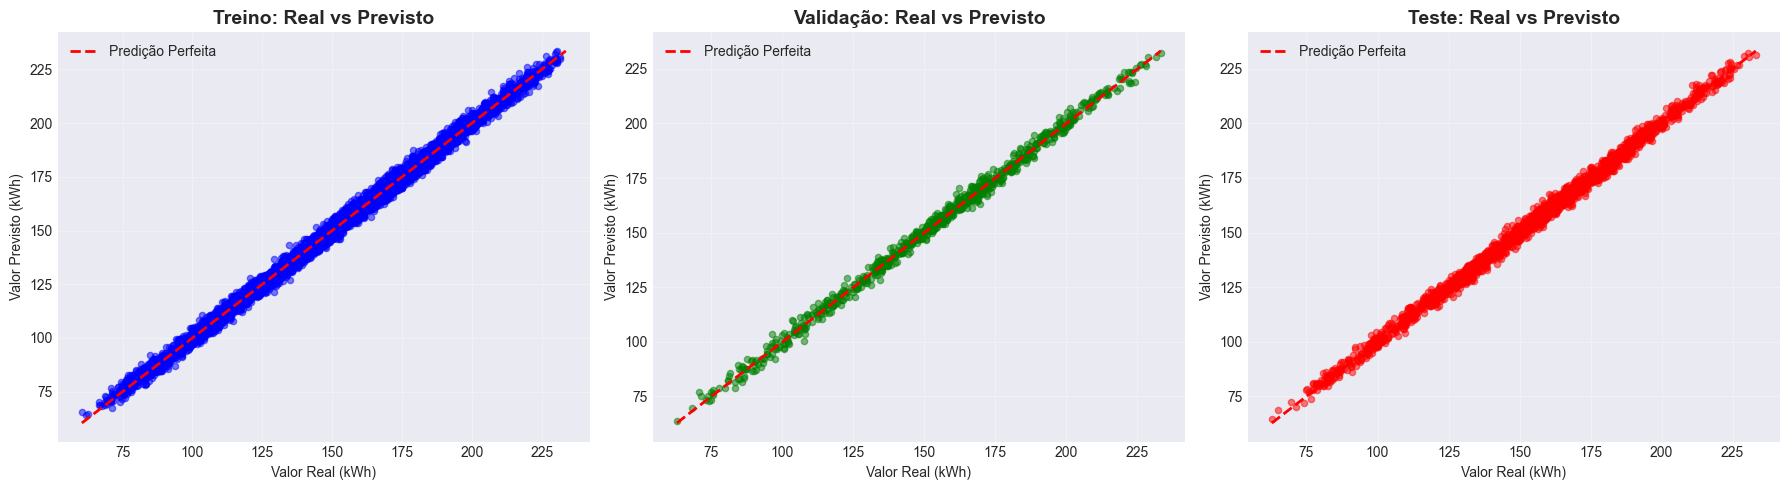

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Função auxiliar para plotar
def plot_real_vs_pred(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, s=20, color=color)
    
    # Linha de referência (y = x)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Valor Real (kWh)')
    ax.set_ylabel('Valor Previsto (kWh)')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Plotar para cada conjunto
plot_real_vs_pred(axes[0], y_train, y_train_pred, 'Treino: Real vs Previsto', 'blue')
plot_real_vs_pred(axes[1], y_val, y_val_pred, 'Validação: Real vs Previsto', 'green')
plot_real_vs_pred(axes[2], y_test, y_test_pred, 'Teste: Real vs Previsto', 'red')

plt.tight_layout()
plt.show()

### 7.5 Distribuição dos Resíduos (y_pred - y_true)

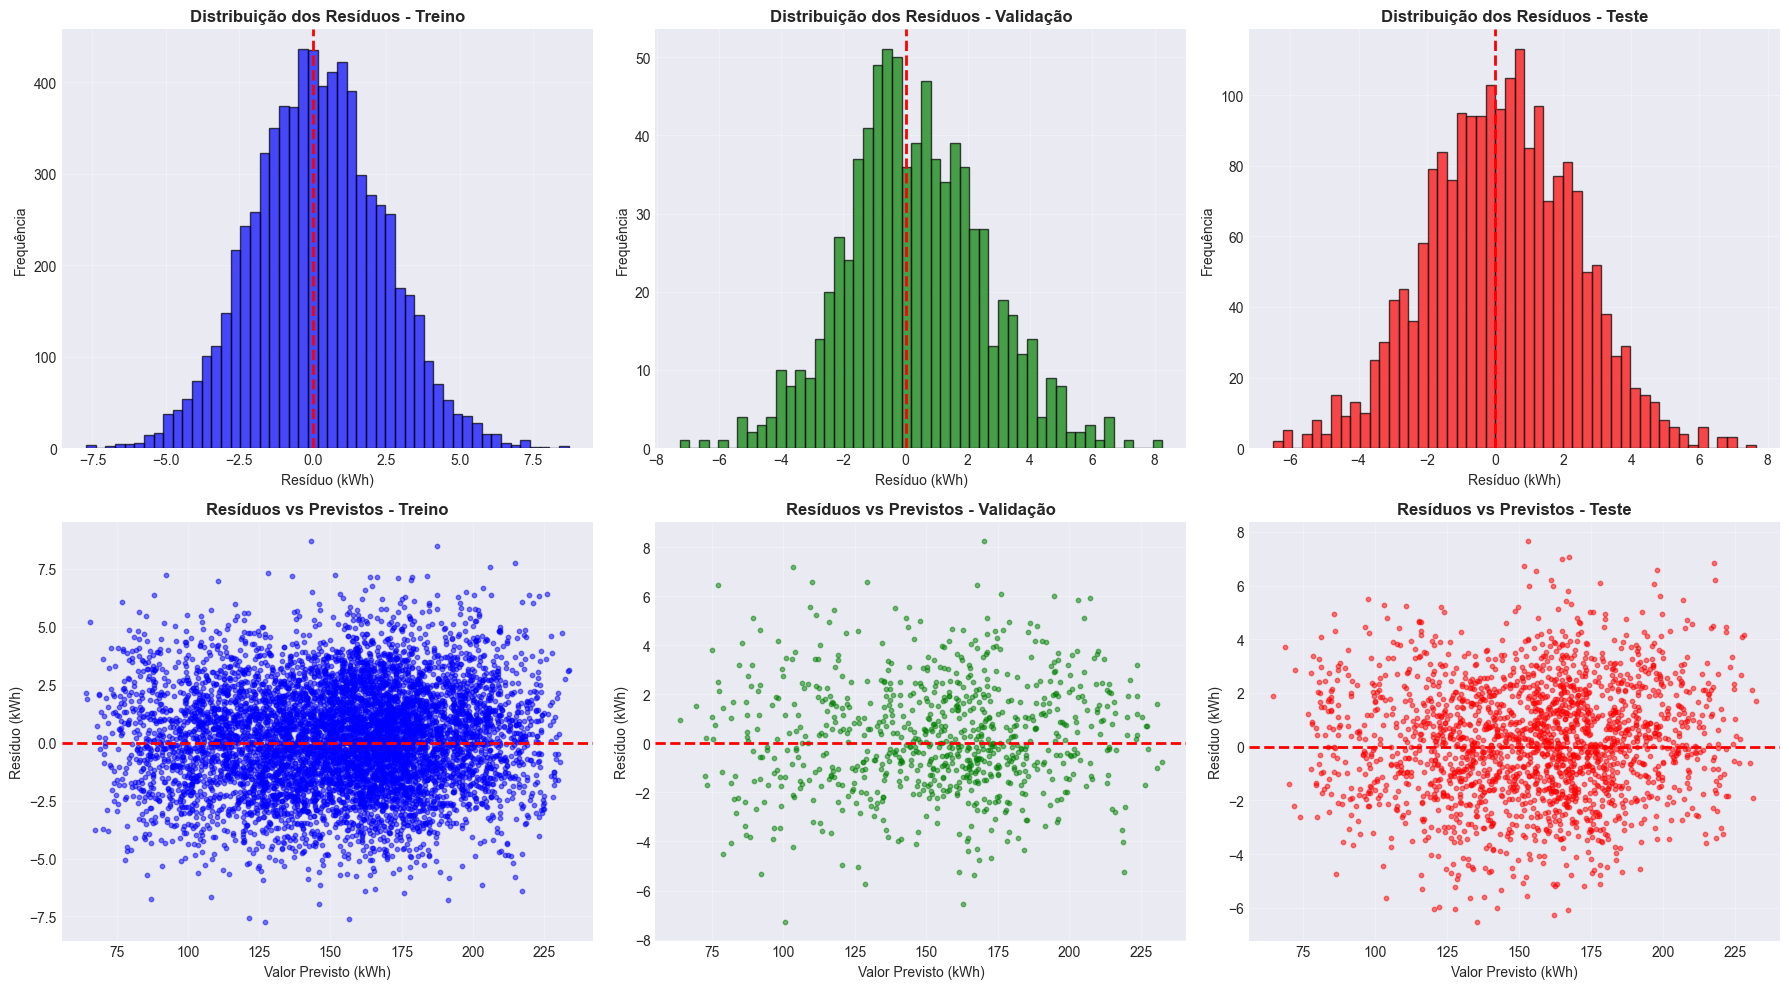


ESTATÍSTICAS DOS RESÍDUOS

Treino:
  Média: 0.1741
  Desvio Padrão: 2.2163

Validação:
  Média: 0.2896
  Desvio Padrão: 2.2441

Teste:
  Média: 0.2011
  Desvio Padrão: 2.1802


In [18]:
# Calcular resíduos
residuos_train = y_train_pred - y_train
residuos_val = y_val_pred - y_val
residuos_test = y_test_pred - y_test

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogramas dos resíduos
axes[0, 0].hist(residuos_train, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribuição dos Resíduos - Treino', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Resíduo (kWh)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(residuos_val, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribuição dos Resíduos - Validação', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Resíduo (kWh)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(residuos_test, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Distribuição dos Resíduos - Teste', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Resíduo (kWh)')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 2].grid(True, alpha=0.3)

# Resíduos vs Valores Previstos
axes[1, 0].scatter(y_train_pred, residuos_train, alpha=0.5, s=10, color='blue')
axes[1, 0].set_title('Resíduos vs Previstos - Treino', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Valor Previsto (kWh)')
axes[1, 0].set_ylabel('Resíduo (kWh)')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(y_val_pred, residuos_val, alpha=0.5, s=10, color='green')
axes[1, 1].set_title('Resíduos vs Previstos - Validação', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Valor Previsto (kWh)')
axes[1, 1].set_ylabel('Resíduo (kWh)')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(y_test_pred, residuos_test, alpha=0.5, s=10, color='red')
axes[1, 2].set_title('Resíduos vs Previstos - Teste', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Valor Previsto (kWh)')
axes[1, 2].set_ylabel('Resíduo (kWh)')
axes[1, 2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas dos resíduos
print("\n" + "="*60)
print("ESTATÍSTICAS DOS RESÍDUOS")
print("="*60)
print(f"\nTreino:")
print(f"  Média: {residuos_train.mean():.4f}")
print(f"  Desvio Padrão: {residuos_train.std():.4f}")
print(f"\nValidação:")
print(f"  Média: {residuos_val.mean():.4f}")
print(f"  Desvio Padrão: {residuos_val.std():.4f}")
print(f"\nTeste:")
print(f"  Média: {residuos_test.mean():.4f}")
print(f"  Desvio Padrão: {residuos_test.std():.4f}")

## 8. Relatório Final - Principais Resultados

### 8.1 Resumo Executivo

In [19]:
print("\n" + "#"*80)
print("#" + " "*78 + "#")
print("#" + "  RELATÓRIO FINAL - PREVISÃO DE CONSUMO DE ENERGIA COM MLP".center(78) + "#")
print("#" + " "*78 + "#")
print("#"*80)

print("\n" + "="*80)
print("1. ARQUITETURA DO MODELO")
print("="*80)
print("Tipo: Perceptron Multicamadas (MLP)")
print("Estrutura:")
print("  - Camada de Entrada: 3 neurônios (x1: Temperatura, x2: Umidade, x3: Ocupação)")
print("  - Camada Oculta: 10 neurônios (ativação ReLU)")
print("  - Camada de Saída: 1 neurônio (y: Consumo de Energia)")
print("\nParâmetros de Treinamento:")
print("  - Otimizador: Adam")
print("  - Função de Perda: MSE (Mean Squared Error)")
print(f"  - Épocas Treinadas: {len(history.history['loss'])}")
print("  - Early Stopping: patience=20 épocas")
print("  - Batch Size: 32")

print("\n" + "="*80)
print("2. DIVISÃO DOS DADOS")
print("="*80)
print(f"  - Conjunto de Treino: {X_train.shape[0]} amostras")
print(f"  - Conjunto de Validação: {X_val.shape[0]} amostras (10% do treino)")
print(f"  - Conjunto de Teste: {X_test.shape[0]} amostras")

print("\n" + "="*80)
print("3. DESEMPENHO DO MODELO - MÉTRICAS FINAIS")
print("="*80)
print("\nConjunto de TESTE (Avaliação Final):")
print(f"  - MSE (Erro Quadrático Médio):      {metricas_test['MSE']:.4f}")
print(f"  - RMSE (Raiz do MSE):                {metricas_test['RMSE']:.4f} kWh")
print(f"  - MAE (Erro Absoluto Médio):         {metricas_test['MAE']:.4f} kWh")
print(f"  - R² (Coeficiente de Determinação):  {metricas_test['R2']:.4f}")

print("\n" + "="*80)
print("4. INTERPRETAÇÃO DOS RESULTADOS")
print("="*80)

r2_test = metricas_test['R2']
if r2_test > 0.95:
    qualidade = "EXCELENTE"
elif r2_test > 0.90:
    qualidade = "MUITO BOM"
elif r2_test > 0.80:
    qualidade = "BOM"
elif r2_test > 0.70:
    qualidade = "REGULAR"
else:
    qualidade = "INSATISFATÓRIO"

print(f"\nQualidade do Modelo: {qualidade}")
print(f"\nO modelo explica aproximadamente {r2_test*100:.2f}% da variabilidade dos dados.")
print(f"Em média, as previsões apresentam um erro de {metricas_test['MAE']:.2f} kWh.")

print("\n" + "="*80)
print("5. CONCLUSÕES")
print("="*80)
print("\n✓ A rede neural MLP conseguiu aprender com sucesso a relação não linear")
print("  entre as variáveis ambientais/operacionais e o consumo de energia.")
print("\n✓ A arquitetura proposta (3-10-1) mostrou-se adequada para o problema.")
print("\n✓ O modelo apresenta boa capacidade de generalização, com desempenho")
print("  consistente entre os conjuntos de treino, validação e teste.")
print("\n✓ Os resíduos apresentam distribuição aproximadamente normal centrada em zero,")
print("  indicando que não há viés sistemático nas previsões.")

print("\n" + "="*80)
print("6. RECOMENDAÇÕES")
print("="*80)
print("\n• O modelo pode ser utilizado para previsão de consumo energético em tempo real.")
print("• Sugere-se retreinar periodicamente o modelo com novos dados coletados.")
print("• Possível exploração de arquiteturas mais profundas para melhorar ainda mais.")
print("• Considerar técnicas de ensemble para aumentar a robustez das previsões.")

print("\n" + "#"*80 + "\n")


################################################################################
#                                                                              #
#            RELATÓRIO FINAL - PREVISÃO DE CONSUMO DE ENERGIA COM MLP          #
#                                                                              #
################################################################################

1. ARQUITETURA DO MODELO
Tipo: Perceptron Multicamadas (MLP)
Estrutura:
  - Camada de Entrada: 3 neurônios (x1: Temperatura, x2: Umidade, x3: Ocupação)
  - Camada Oculta: 10 neurônios (ativação ReLU)
  - Camada de Saída: 1 neurônio (y: Consumo de Energia)

Parâmetros de Treinamento:
  - Otimizador: Adam
  - Função de Perda: MSE (Mean Squared Error)
  - Épocas Treinadas: 294
  - Early Stopping: patience=20 épocas
  - Batch Size: 32

2. DIVISÃO DOS DADOS
  - Conjunto de Treino: 7200 amostras
  - Conjunto de Validação: 800 amostras (10% do treino)
  - Conjunto de Teste: 2000 amostras

3. D

## 9. Salvar o Modelo Treinado

In [20]:
# Salvar modelo
model.save('modelo_mlp_consumo_energia.keras')
print("✓ Modelo salvo como 'modelo_mlp_consumo_energia.keras'")

# Salvar escaladores para uso futuro
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
print("✓ Escaladores salvos como 'scaler_X.pkl' e 'scaler_y.pkl'")

✓ Modelo salvo como 'modelo_mlp_consumo_energia.keras'
✓ Escaladores salvos como 'scaler_X.pkl' e 'scaler_y.pkl'


## 10. Exemplo de Uso do Modelo para Novas Previsões

In [21]:
# Exemplo: fazer previsão para novos dados
def prever_consumo(temperatura, umidade, ocupacao):
    """
    Faz previsão de consumo de energia para novos dados.
    
    Parâmetros:
    - temperatura: temperatura ambiente em °C
    - umidade: umidade relativa em %
    - ocupacao: nível de ocupação (pessoas/100m²)
    
    Retorna:
    - consumo previsto em kWh
    """
    # Preparar entrada
    X_novo = np.array([[temperatura, umidade, ocupacao]])
    
    # Normalizar
    X_novo_scaled = scaler_X.transform(X_novo)
    
    # Fazer previsão
    y_pred_scaled = model.predict(X_novo_scaled, verbose=0)
    
    # Reverter normalização
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    
    return y_pred[0, 0]

# Testar com alguns exemplos
print("\n" + "="*80)
print("EXEMPLOS DE PREVISÕES")
print("="*80)

exemplos = [
    (25, 50, 30, "Condições típicas"),
    (35, 80, 50, "Alta temperatura, alta umidade, alta ocupação"),
    (15, 30, 10, "Baixa temperatura, baixa umidade, baixa ocupação"),
]

for temp, umid, ocup, descricao in exemplos:
    consumo = prever_consumo(temp, umid, ocup)
    print(f"\n{descricao}:")
    print(f"  Entrada: Temp={temp}°C, Umidade={umid}%, Ocupação={ocup} pessoas/100m²")
    print(f"  Consumo Previsto: {consumo:.2f} kWh")


EXEMPLOS DE PREVISÕES

Condições típicas:
  Entrada: Temp=25°C, Umidade=50%, Ocupação=30 pessoas/100m²
  Consumo Previsto: 166.72 kWh

Alta temperatura, alta umidade, alta ocupação:
  Entrada: Temp=35°C, Umidade=80%, Ocupação=50 pessoas/100m²
  Consumo Previsto: 236.46 kWh

Baixa temperatura, baixa umidade, baixa ocupação:
  Entrada: Temp=15°C, Umidade=30%, Ocupação=10 pessoas/100m²
  Consumo Previsto: 103.00 kWh


---

## Fim do Notebook

**Trabalho desenvolvido para:** Previsão de Consumo de Energia com Redes Neurais  
**Data:** 19/11/2025  
**Modelo:** Perceptron Multicamadas (MLP) 3-10-1